In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

nfl_data = pd.read_csv('nfl_offensive_stats.csv')

In [2]:
nfl_data.head()

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019


In [3]:
missing = pd.concat([nfl_data.isnull().sum(), 100 * nfl_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Vegas_Favorite,46,0.230311
game_id,0,0.000000
pass_target_yds,0,0.000000
rush_broken_tackles,0,0.000000
rush_yac,0,0.000000
...,...,...
Team_abbrev,0,0.000000
Opponent_abbrev,0,0.000000
two_point_conv,0,0.000000
total_ret_td,0,0.000000


In [4]:
#Vegas_Favorite is the only column missing values and it is a categorical feature. However the amount of missing values is a small %

In [5]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19973 entries, 0 to 19972
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       19973 non-null  object 
 1   player_id                     19973 non-null  object 
 2   position                      19973 non-null  object 
 3   player                        19973 non-null  object 
 4   team                          19973 non-null  object 
 5   pass_cmp                      19973 non-null  int64  
 6   pass_att                      19973 non-null  int64  
 7   pass_yds                      19973 non-null  int64  
 8   pass_td                       19973 non-null  int64  
 9   pass_int                      19973 non-null  int64  
 10  pass_sacked                   19973 non-null  int64  
 11  pass_sacked_yds               19973 non-null  int64  
 12  pass_long                     19973 non-null  int64  
 13  p

In [6]:
nfl_data.select_dtypes(include= 'object') #exploring other available categorical features

,game_id,player_id,position,player,team,Team_abbrev,Opponent_abbrev,vis_team,home_team,Roof,Surface,Vegas_Favorite,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,GNB,CHI,GNB,CHI,outdoors,grass,CHI,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,GNB,CHI,GNB,CHI,outdoors,grass,CHI,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,GNB,CHI,GNB,CHI,outdoors,grass,CHI,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,GNB,CHI,GNB,CHI,outdoors,grass,CHI,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,GNB,CHI,GNB,CHI,outdoors,grass,CHI,9/5/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,202202130cin,PoweBr00,WR,Brandon Powell,LAR,LAR,CIN,LAR,CIN,dome,matrixturf,LAR,2/13/2022
19969,202202130cin,HoweGr00,RB,Buddy Howell,LAR,LAR,CIN,LAR,CIN,dome,matrixturf,LAR,2/13/2022
19970,202202130cin,SampDr00,TE,Drew Sample,CIN,CIN,LAR,LAR,CIN,dome,matrixturf,LAR,2/13/2022
19971,202202130cin,TaylTr02,WR,Trent Taylor,CIN,CIN,LAR,LAR,CIN,dome,matrixturf,LAR,2/13/2022


In [7]:
#creating over/under groupby for teams 
team_avg_overunder = nfl_data.groupby('team')['Over_Under'].mean()
team_avg_overunder.head()

team
ARI    48.761246
ATL    49.208138
BAL    46.469880
BUF    46.014350
CAR    45.906404
Name: Over_Under, dtype: float64

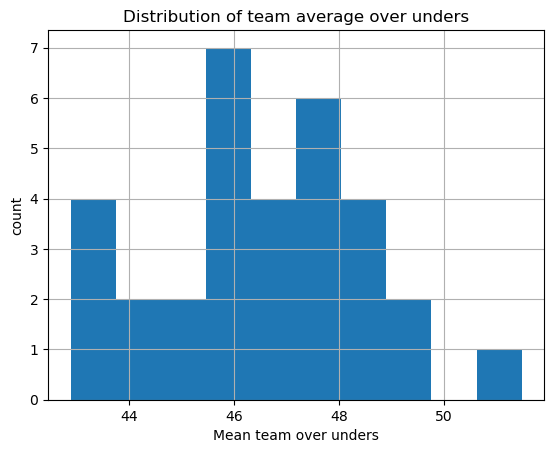

In [8]:
#looking at distribution for groupby above with histogram
team_avg_overunder.hist()
plt.title('Distribution of team average over unders')
plt.xlabel('Mean team over unders')
plt.ylabel('count');

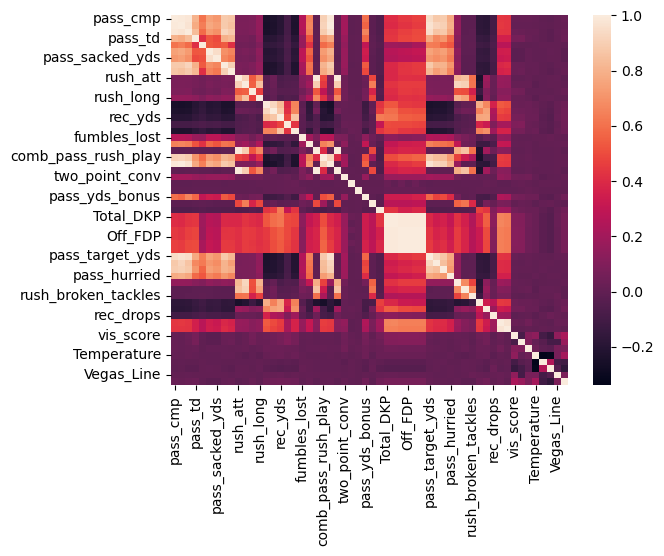

In [9]:
#rough heatmap
sns.heatmap(nfl_data.corr());

In [10]:
nfl_data[nfl_data.Team_abbrev != nfl_data.game_date].groupby('game_date')['Team_abbrev'].value_counts()

game_date  Team_abbrev
1/10/2021  NOR            13
           TEN            13
           BAL            12
           CHI            12
           CLE            12
                          ..
9/9/2019   LVR            12
           NOR            12
           HOU             9
9/9/2021   TAM            12
           DAL            11
Name: Team_abbrev, Length: 1640, dtype: int64

In [11]:
nfl_data[['Team_abbrev', 'game_date']].nunique()

Team_abbrev     32
game_date      174
dtype: int64

In [12]:
nfl_data_clean1 = nfl_data.drop_duplicates(['Team_abbrev', 'game_date'],keep= 'last')
test = nfl_data_clean1[nfl_data_clean1.Team_abbrev != nfl_data_clean1.game_date].groupby('game_date')['Team_abbrev'].value_counts()
test1 = test.reset_index(name='count')

test1.count()

game_date      1640
Team_abbrev    1640
count          1640
dtype: int64

In [13]:
nfl_data_clean1.head(20)

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
22,201909050chi,AlliGe01,WR,Geronimo Allison,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
23,201909050chi,SoweBr00,TE,Bradley Sowell,CHI,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
38,201909080car,HendDa00,RB,Darrell Henderson,LAR,0,0,0,0,0,...,False,outdoors,grass,87,53,3,-1.5,LAR,49.5,9/8/2019
43,201909080car,ManhCh00,TE,Chris Manhertz,CAR,0,0,0,0,0,...,False,outdoors,grass,87,53,3,-1.5,LAR,49.5,9/8/2019
62,201909080cle,FlueDa00,RB,David Fluellen,TEN,0,0,0,0,0,...,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,9/8/2019
67,201909080cle,HarrDe03,TE,Demetrius Harris,CLE,0,0,0,0,0,...,False,outdoors,grass,71,55,10,-5.5,CLE,44.0,9/8/2019
84,201909080crd,LacyCh00,WR,Chris Lacy,DET,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,9/8/2019
90,201909080crd,ByrdDa00,WR,Damiere Byrd,ARI,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,9/8/2019
112,201909080dal,EngrEv00,TE,Evan Engram,NYG,0,0,0,0,0,...,False,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,9/8/2019
114,201909080dal,SmitDe04,WR,Devin Smith,DAL,0,0,0,0,0,...,False,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,9/8/2019


In [14]:
nfl_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 22 to 19972
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       1640 non-null   object 
 1   player_id                     1640 non-null   object 
 2   position                      1640 non-null   object 
 3   player                        1640 non-null   object 
 4   team                          1640 non-null   object 
 5   pass_cmp                      1640 non-null   int64  
 6   pass_att                      1640 non-null   int64  
 7   pass_yds                      1640 non-null   int64  
 8   pass_td                       1640 non-null   int64  
 9   pass_int                      1640 non-null   int64  
 10  pass_sacked                   1640 non-null   int64  
 11  pass_sacked_yds               1640 non-null   int64  
 12  pass_long                     1640 non-null   int64  
 13  p

In [15]:
nfl_data_clean1.loc[(nfl_data_clean1.team == 'GNB'), 'game_date']

22         9/5/2019
523       9/15/2019
917       9/22/2019
1163      9/26/2019
1571      10/6/2019
2167     10/14/2019
2389     10/20/2019
2718     10/27/2019
3141      11/3/2019
3355     11/10/2019
4113     11/24/2019
4473      12/1/2019
4704      12/8/2019
5101     12/15/2019
5695     12/23/2019
5840     12/29/2019
6252      1/12/2020
6325      1/19/2020
6522      9/13/2020
6879      9/20/2020
7334      9/27/2020
7868      10/5/2020
8531     10/18/2020
8726     10/25/2020
9126      11/1/2020
9293      11/5/2020
9765     11/15/2020
10048    11/22/2020
10505    11/29/2020
10793     12/6/2020
11208    12/13/2020
11541    12/19/2020
12010    12/27/2020
12328      1/3/2021
12835     1/16/2021
12909     1/24/2021
13202     9/12/2021
13747     9/20/2021
14107     9/26/2021
14312     10/3/2021
14637    10/10/2021
14991    10/17/2021
15352    10/24/2021
15629    10/28/2021
16116     11/7/2021
16467    11/14/2021
16871    11/21/2021
17215    11/28/2021
17895    12/12/2021
18329    12/19/2021


In [16]:
def f(row):
    if row['home_score'] > row['vis_score']:
        val = row['home_team']
    elif row['home_score'] < row['vis_score']:
        val = row['vis_team']
    elif row['home_score'] == row['vis_score']:
        val = 'tie'
    else:
        val = 'error'
    return val

nfl_data_clean1['winning_team'] = nfl_data_clean1.apply(f, axis=1)

nfl_data_clean1.head(20)

C:\Users\Octavio Fierros\AppData\Local\Temp\ipykernel_16804\2287105534.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_data_clean1['winning_team'] = nfl_data_clean1.apply(f, axis=1)


,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date,winning_team
22,201909050chi,AlliGe01,WR,Geronimo Allison,GNB,0,0,0,0,0,...,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019,GNB
23,201909050chi,SoweBr00,TE,Bradley Sowell,CHI,0,0,0,0,0,...,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019,GNB
38,201909080car,HendDa00,RB,Darrell Henderson,LAR,0,0,0,0,0,...,outdoors,grass,87,53,3,-1.5,LAR,49.5,9/8/2019,LAR
43,201909080car,ManhCh00,TE,Chris Manhertz,CAR,0,0,0,0,0,...,outdoors,grass,87,53,3,-1.5,LAR,49.5,9/8/2019,LAR
62,201909080cle,FlueDa00,RB,David Fluellen,TEN,0,0,0,0,0,...,outdoors,grass,71,55,10,-5.5,CLE,44.0,9/8/2019,TEN
67,201909080cle,HarrDe03,TE,Demetrius Harris,CLE,0,0,0,0,0,...,outdoors,grass,71,55,10,-5.5,CLE,44.0,9/8/2019,TEN
84,201909080crd,LacyCh00,WR,Chris Lacy,DET,0,0,0,0,0,...,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,9/8/2019,tie
90,201909080crd,ByrdDa00,WR,Damiere Byrd,ARI,0,0,0,0,0,...,retractable roof (closed),grass,72,45,0,-2.5,DET,45.5,9/8/2019,tie
112,201909080dal,EngrEv00,TE,Evan Engram,NYG,0,0,0,0,0,...,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,9/8/2019,DAL
114,201909080dal,SmitDe04,WR,Devin Smith,DAL,0,0,0,0,0,...,retractable roof (closed),fieldturf,72,45,0,-7.0,DAL,44.0,9/8/2019,DAL


In [17]:
print(nfl_data_clean1.iloc[0])

game_id               201909050chi
player_id                 AlliGe01
position                        WR
player            Geronimo Allison
team                           GNB
                        ...       
Vegas_Line                    -3.5
Vegas_Favorite                 CHI
Over_Under                    47.0
game_date                 9/5/2019
winning_team                   GNB
Name: 22, Length: 70, dtype: object


In [21]:
nfl_data_clean2 = nfl_data_clean1[nfl_data_clean1['winning_team'] != 'tie']
nfl_data_clean2.to_csv('data.csv')

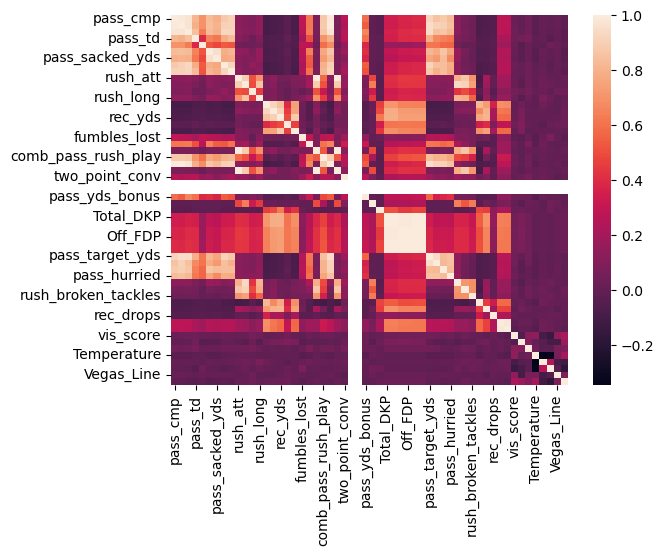

In [22]:
#2nd heatmap
sns.heatmap(nfl_data_clean2.corr());